In [1]:
import os

In [3]:
pip install findspark


Note: you may need to restart the kernel to use updated packages.


In [4]:
import findspark
findspark.init()

import pyspark 

In [5]:
from pyspark.sql import SparkSession


In [7]:
spark = SparkSession.builder.appName('regression').getOrCreate()


In [9]:
import sklearn
from sklearn.datasets import load_breast_cancer

In [22]:
spark = SparkSession.builder.appName('regression').getOrCreate()


In [23]:
df = spark.read.csv("data.csv", inferSchema=True, header=True)


In [24]:
print(df.columns)
print(df.count())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', '_c32']
569


In [25]:
df.drop('radius_se','texture_se','texture_se','perimeter_se','area_se','compactness_se','smoothness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst')
df.columns

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 '_c32']

In [26]:
from pyspark.sql.functions import isnan, when, count, col
df.columns

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 '_c32']

In [27]:
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()


+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
| id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|_c32|
+---+---------+-----------+------------+--------

In [28]:
df.na.drop().show(5)

+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
| id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|_c32|
+---+---------+-----------+------------+--------

In [29]:
print(df.count())

569


In [30]:
df.show(5)

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|_c32|
+--------+---------+-----------+------

In [31]:
df.columns


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 '_c32']

In [32]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
df.groupBy('diagnosis').count().show()
class_indexer = StringIndexer(inputCol="diagnosis", outputCol="label")
#Fit and transform the dataframe
df = class_indexer.fit(df).transform(df)
df.show(5)


+---------+-----+
|diagnosis|count|
+---------+-----+
|        B|  357|
|        M|  212|
+---------+-----+

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+-----+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|conca

In [34]:
df.select(['diagnosis', 'label']).show(5)


+---------+-----+
|diagnosis|label|
+---------+-----+
|        M|  1.0|
|        M|  1.0|
|        M|  1.0|
|        M|  1.0|
|        M|  1.0|
+---------+-----+
only showing top 5 rows



In [35]:
def transformColumnsToNumeric(df, inputCol):
    
    #apply StringIndexer to inputCol
    inputCol_indexer = StringIndexer(inputCol = inputCol, outputCol = inputCol + "-index").fit(df)
    df = inputCol_indexer.transform(df)
    
    onehotencoder_vector = OneHotEncoder(inputCol = inputCol + "-index", outputCol = inputCol + "-vector")
    df = onehotencoder_vector.fit(df).transform(df)
    
    return df
    
    pass

In [36]:
from pyspark.ml.feature import VectorAssembler
df.drop('radius_se','texture_se','texture_se','perimeter_se','area_se','compactness_se','smoothness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst','_c32')

DataFrame[id: int, diagnosis: string, radius_mean: double, texture_mean: double, perimeter_mean: double, area_mean: double, smoothness_mean: double, compactness_mean: double, concavity_mean: double, concave points_mean: double, symmetry_mean: double, fractal_dimension_mean: double, label: double]

In [37]:
df = transformColumnsToNumeric(df, "diagnosis")
df = transformColumnsToNumeric(df, "radius_mean")
df = transformColumnsToNumeric(df, "texture_mean")
df = transformColumnsToNumeric(df, "perimeter_mean")
# df = transformColumnsToNumeric(df, "breast")
# df = transformColumnsToNumeric(df, "breast-quad")
# df = transformColumnsToNumeric(df, "irradiat")


In [38]:
df = transformColumnsToNumeric(df, "smoothness_mean")
df = transformColumnsToNumeric(df, "compactness_mean")
df = transformColumnsToNumeric(df, "concave points_mean")
df = transformColumnsToNumeric(df, "symmetry_mean")
df = transformColumnsToNumeric(df, "fractal_dimension_mean")



In [39]:
df.printSchema()


root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

In [40]:
df = df.drop('_c32')

In [41]:
df.columns


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'label',
 'diagnosis-index',
 'diagnosis-vector',
 'radius_mean-index',
 'radius_mean-vector',
 'texture_mean-index',
 'texture_mean-vector',
 'perimeter_mean-index',
 'perimeter_mean-vector',
 'smoothness_mean-index',
 'smoothness_mean-vector',
 'compactness_mean-index',
 'compactness_mean-vector',
 'concave points_mean-index',
 'concave points_mean-vector',
 'symmetry_mean-index',
 'symmetry_mean-v

In [42]:
inputCols=['diagnosis-vector',
 'radius_mean-vector',
 'texture_mean-vector',
 'perimeter_mean-vector',
 'smoothness_mean-vector',
 'compactness_mean-vector',
 'concave points_mean-vector',
 'symmetry_mean-vector',
 'fractal_dimension_mean-vector']

In [43]:
df_va = VectorAssembler(inputCols = inputCols, outputCol="features")


In [44]:
df = df_va.transform(df)


In [45]:
df.select(inputCols + ["features"] ).show(5)

+----------------+------------------+-------------------+---------------------+----------------------+-----------------------+--------------------------+--------------------+-----------------------------+--------------------+
|diagnosis-vector|radius_mean-vector|texture_mean-vector|perimeter_mean-vector|smoothness_mean-vector|compactness_mean-vector|concave points_mean-vector|symmetry_mean-vector|fractal_dimension_mean-vector|            features|
+----------------+------------------+-------------------+---------------------+----------------------+-----------------------+--------------------------+--------------------+-----------------------------+--------------------+
|       (1,[],[])|  (455,[87],[1.0])|   (478,[81],[1.0])|    (521,[113],[1.0])|     (473,[446],[1.0])|      (536,[531],[1.0])|          (541,[14],[1.0])|   (431,[416],[1.0])|            (498,[483],[1.0])|(3934,[88,537,104...|
|       (1,[],[])| (455,[383],[1.0])|  (478,[235],[1.0])|     (521,[17],[1.0])|     (473,[186],[

In [46]:
df.select(['features','label']).show(10,False)

+--------------------------------------------------------------------------------+-----+
|features                                                                        |label|
+--------------------------------------------------------------------------------+-----+
|(3934,[88,537,1047,1901,2459,2478,3421,3919],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |1.0  |
|(3934,[384,691,951,1641,2167,2863,3265,3436],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |1.0  |
|(3934,[365,518,948,1470,1955,2981,3103,3654],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |1.0  |
|(3934,[136,775,1260,1926,2461,2959,3431],[1.0,1.0,1.0,1.0,1.0,1.0,1.0])         |1.0  |
|(3934,[376,593,1077,1493,2348,2476,3023,3460],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|1.0  |
|(3934,[47,457,1314,1918,1956,2890,3365,3906],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |1.0  |
|(3934,[340,509,1038,1489,2281,2869,3073,3599],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|1.0  |
|(3934,[68,787,1390,1902,2395,2830,3108,3901],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |1.0  |
|(3934,[11,815,1365,1

In [47]:
df_transformed = df.select(['features','label'])
df_transformed.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(3934,[88,537,104...|  1.0|
|(3934,[384,691,95...|  1.0|
|(3934,[365,518,94...|  1.0|
|(3934,[136,775,12...|  1.0|
|(3934,[376,593,10...|  1.0|
+--------------------+-----+
only showing top 5 rows



In [48]:
df_transformed.groupBy('label').count().show()


+-----+-----+
|label|count|
+-----+-----+
|  0.0|  357|
|  1.0|  212|
+-----+-----+



In [49]:
from sklearn.model_selection import train_test_split
train_df, test_df = df_transformed.randomSplit([0.7, 0.3], seed = 2018)

In [50]:
test_df.count()

169

In [51]:
from pyspark.ml.classification import LogisticRegression

In [52]:
model = LogisticRegression(labelCol='label')
model


LogisticRegression_64f656c1f197

In [53]:
trained_model = model.fit(train_df)


In [54]:
train_predictions = trained_model.evaluate(train_df).predictions
train_predictions.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(3934,[0,1,549,12...|  0.0|[19.8474052200981...|[0.99999999759905...|       0.0|
|(3934,[0,1,611,96...|  0.0|[19.3119095629209...|[0.99999999589848...|       0.0|
|(3934,[0,2,468,11...|  0.0|[19.8448802181110...|[0.99999999759298...|       0.0|
|(3934,[0,2,481,11...|  0.0|[19.5924461108764...|[0.99999999690180...|       0.0|
|(3934,[0,2,548,11...|  0.0|[19.5887814948042...|[0.99999999689043...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [55]:
train_df_count_1 = train_df.filter(train_df['label'] == 1).count()
train_df_count_0 = train_df.filter(train_df['label'] == 0).count()
train_df_count_1, train_df_count_0


(149, 251)

In [56]:
cp = train_predictions.filter(
train_predictions['label'] == 1).filter(
train_predictions['prediction'] == 1).select(
['label','prediction','probability'])
print("Correct predictions: ", cp.count())
accuracy = (cp.count()) /  train_df_count_1
print(f"Accuracy: {accuracy}\n")
cp.show(5,False)


Correct predictions:  149
Accuracy: 1.0

+-----+----------+-----------------------------------------+
|label|prediction|probability                              |
+-----+----------+-----------------------------------------+
|1.0  |1.0       |[6.625114735748751E-9,0.9999999933748852]|
|1.0  |1.0       |[4.221794706868124E-9,0.9999999957782053]|
|1.0  |1.0       |[4.634351996351668E-9,0.999999995365648] |
|1.0  |1.0       |[6.134178016263029E-9,0.999999993865822] |
|1.0  |1.0       |[5.639076260416641E-9,0.9999999943609238]|
+-----+----------+-----------------------------------------+
only showing top 5 rows



In [57]:
fp = train_predictions.filter(
train_predictions['label'] == 0).filter(
train_predictions['prediction'] == 1).select(
['label','prediction','probability'])
print("False positive: ", fp.count())
fp.show(5,False)


False positive:  0
+-----+----------+-----------+
|label|prediction|probability|
+-----+----------+-----------+
+-----+----------+-----------+



In [58]:
fn = train_predictions.filter(
train_predictions['label'] == 1).filter(
train_predictions['prediction'] == 0).select(
['label','prediction','probability'])
print("False negative: ", fn.count())
fn.show(5,False)


False negative:  0
+-----+----------+-----------+
|label|prediction|probability|
+-----+----------+-----------+
+-----+----------+-----------+



In [59]:
test_predictions = trained_model.evaluate(test_df).predictions
test_predictions.show(5, False)


+------------------------------------------------------------------------------------+-----+--------------------------------------+-----------------------------------------+----------+
|features                                                                            |label|rawPrediction                         |probability                              |prediction|
+------------------------------------------------------------------------------------+-----+--------------------------------------+-----------------------------------------+----------+
|(3934,[0,1,528,1289,1497,2253,2682,3039,3829],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|0.0  |[9.628924809556928,-9.628924809556928]|[0.9999342065721388,6.57934278611716E-5] |0.0       |
|(3934,[0,3,607,1179,1565,2009,2502,3165,3708],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|0.0  |[7.794860764850884,-7.794860764850884]|[0.9995883234238289,4.116765761711383E-4]|0.0       |
|(3934,[0,4,713,1216,1645,2056,2573,3013,3457],[1.0,1.0,1.0,1.0,1.0,1.0,1.0

In [60]:
test_df_count_1 = test_df.filter(test_df['label'] == 1).count()
test_df_count_0 = test_df.filter(test_df['label'] == 0).count()
test_df_count_1, test_df_count_0


(63, 106)

In [61]:
cp = test_predictions.filter(
test_predictions['label'] == 1).filter(
test_predictions['prediction'] == 1).select(
['label','prediction','probability'])
print("Correct predictions: ", cp.count())
accuracy = (cp.count()) /  test_df_count_1
print(f"Accuracy: {accuracy}\n")
cp.show(5,False)


Correct predictions:  24
Accuracy: 0.38095238095238093

+-----+----------+------------------------------------------+
|label|prediction|probability                               |
+-----+----------+------------------------------------------+
|1.0  |1.0       |[0.0010144349776338225,0.9989855650223661]|
|1.0  |1.0       |[0.3015956687887972,0.6984043312112028]   |
|1.0  |1.0       |[0.4285233918375617,0.5714766081624383]   |
|1.0  |1.0       |[0.1056207754616007,0.8943792245383992]   |
|1.0  |1.0       |[0.479317585992363,0.5206824140076369]    |
+-----+----------+------------------------------------------+
only showing top 5 rows



In [62]:
fp = test_predictions.filter(
test_predictions['label'] == 0).filter(
test_predictions['prediction'] == 1).select(
['label','prediction','probability'])
print("False positive: ", fp.count())
fp.show(5,False)


False positive:  0
+-----+----------+-----------+
|label|prediction|probability|
+-----+----------+-----------+
+-----+----------+-----------+



In [63]:
fn = test_predictions.filter(
test_predictions['label'] == 1).filter(
test_predictions['prediction'] == 0).select(
['label','prediction','probability'])
print("False negative: ", fn.count())
fn.show(5,False)


False negative:  39
+-----+----------+----------------------------------------+
|label|prediction|probability                             |
+-----+----------+----------------------------------------+
|1.0  |0.0       |[0.929329469393202,0.07067053060679795] |
|1.0  |0.0       |[0.5762790894157201,0.42372091058427985]|
|1.0  |0.0       |[0.999656773022761,3.432269772389862E-4]|
|1.0  |0.0       |[0.9718329563614924,0.02816704363850764]|
|1.0  |0.0       |[0.8301325540167067,0.16986744598329329]|
+-----+----------+----------------------------------------+
only showing top 5 rows



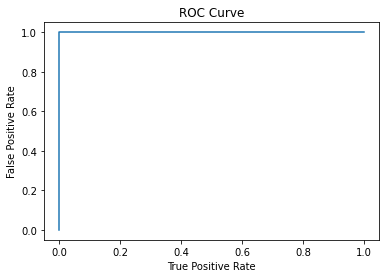

Training set areaUnderROC: 1.0


In [64]:
import matplotlib.pyplot as plt
import numpy as np

trainingSummary = trained_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

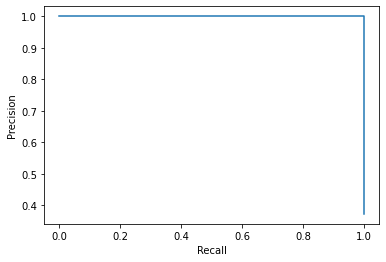

In [65]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()


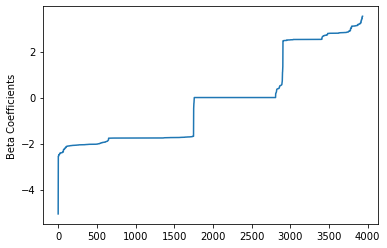

In [66]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(trained_model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()
